In [1]:
import gym
import numpy as np
import Lorenz_envs
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import TensorBoardOutputFormat
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EventCallback
import os
import warnings
from abc import ABC, abstractmethod
from typing import Any, Callable, Dict, List, Optional, Union
from stable_baselines3.common.vec_env import DummyVecEnv, VecEnv, sync_envs_normalization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from stable_baselines3.common.logger import Figure


import numpy as np
from fractions import Fraction
directory = 'lorenz/'


dyn_lorenz = {"sigma":10.0, "R":28.0, "b": 8/3}
x0 = np.array([10.0, 1.0, 0.0])
# x0 = np.array([-8.485, -8.485, 27])
time_step = 2000
alpha = 100

x_velocity = []
def lorenz (x0, dyn, action):
    sigma = dyn['sigma']
    R = dyn['R']
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    z = x0[2]
    return np.array([sigma * (y - x), x * (R + alpha*action - z) - y, x * y - b * z])


def RungeKutta (dyn, f, dt, x0, action):
    k1 = f(x0, dyn, action/4)*dt #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, action/4)*dt
    k3 = f(x0 + 0.5*k2*dt, dyn, action/4)*dt
    k4 = f(x0 + k3*dt, dyn, action/4)*dt
    x = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f_t (dyn, f, dt, x0, T, action):
    x = np.empty(shape=(len(x0),T))
    x[:, 0] = x0     
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1], action) 
    return x

x = f_t(dyn_lorenz, lorenz, 0.01, x0, time_step, 0)



/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment ALE/Tetris-v5
  logger.warn("Overriding environment {}".format(id))
/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment ALE/Tetris-ram-v5
  logger.warn("Overriding environment {}".format(id))
/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment ALE/Pitfall2-v5
  logger.warn("Overriding environment {}".format(id))
/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment ALE/Pitfall2-ram-v5
  logger.warn("Overriding environment {}".format(id))
/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/gym

/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


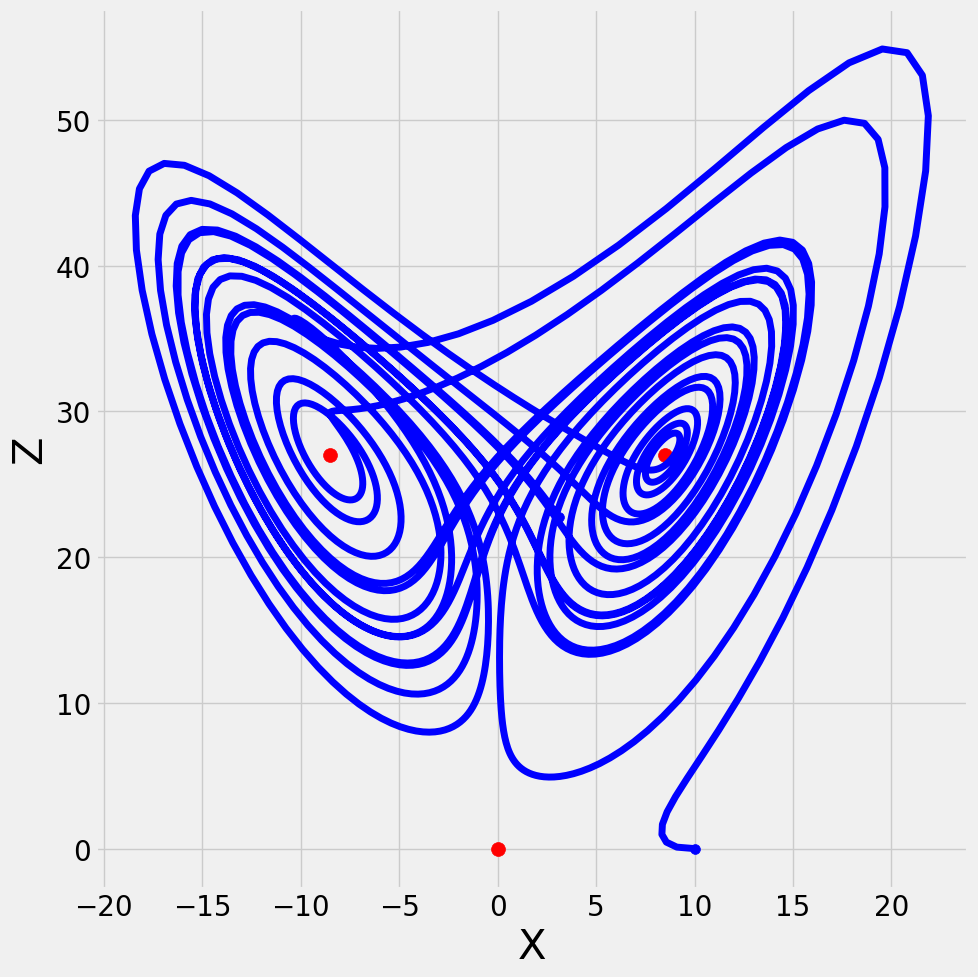

In [77]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(x0[0], x0[2], s=50,alpha=1,c='blue')
ax.plot(x[0], x[2], linewidth=5, c='blue')
ax.scatter(x[0][-1], x[2][-1], s=50,c='blue')
ax.scatter(  -8.485, 27, s=100, c='red', marker='o')
ax.scatter(  8.485,  27 , s=100, c='red', marker='o')
ax.scatter(  0,  0 , s=100, c='red', marker='o')
# ax.scatter(  0,  0,  0 , s=100, c='red', marker='o')
# [ 0.0070262  -0.03513102  0.03513102]
font = {'size': 20}
ax.set_xlabel('X', fontsize=30)
ax.set_ylabel('Z', fontsize=30)
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
plt.tight_layout()
plt.savefig('Lorenz_attractor_rsca.png', transparent=True)

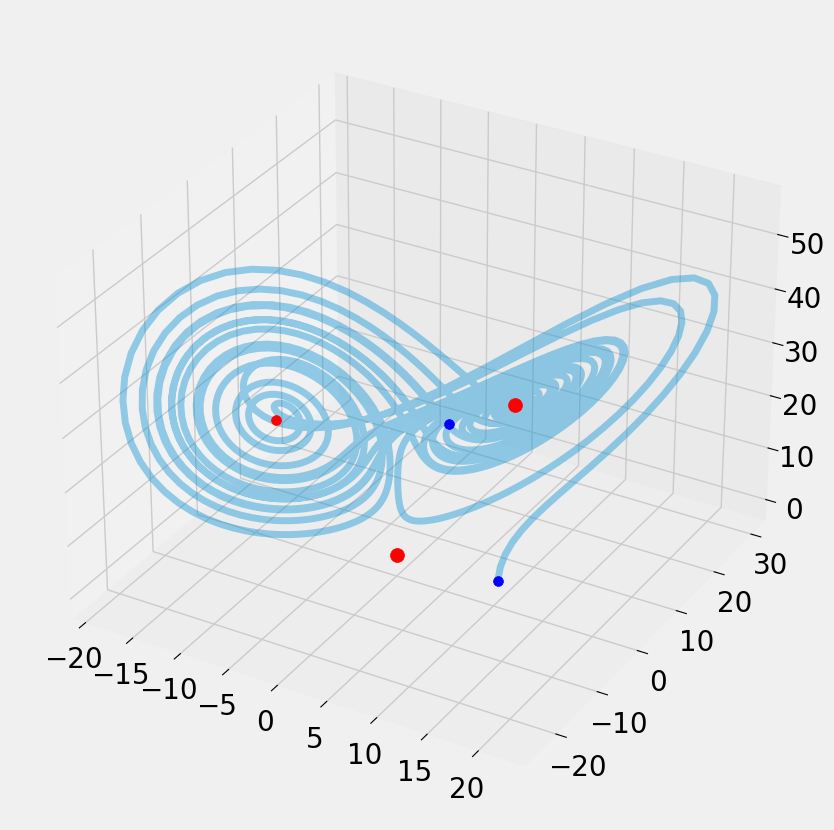

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter3D(x0[0], x0[1], x0[2], s=50,alpha=1,c='blue')
ax.plot3D(x[0], x[1], x[2], alpha=0.4, linewidth=5)
ax.scatter3D(x[0][-1], x[1][-1], x[2][-1], s=50,alpha=1,c='blue')
ax.scatter3D(  -8.485, -8.485,  27, s=50, c='red', marker='o')
ax.scatter3D(  8.485,  8.485,  27 , s=100, c='red', marker='o')
ax.scatter3D(  0,  0,  0 , s=100, c='red', marker='o')
# ax.scatter(  0,  0,  0 , s=100, c='red', marker='o')
# [ 0.0070262  -0.03513102  0.03513102]
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.tick_params('z', labelsize=font['size'])
plt.draw()
plt.savefig('Lorenz_attractor_rsca.png', transparent=True)

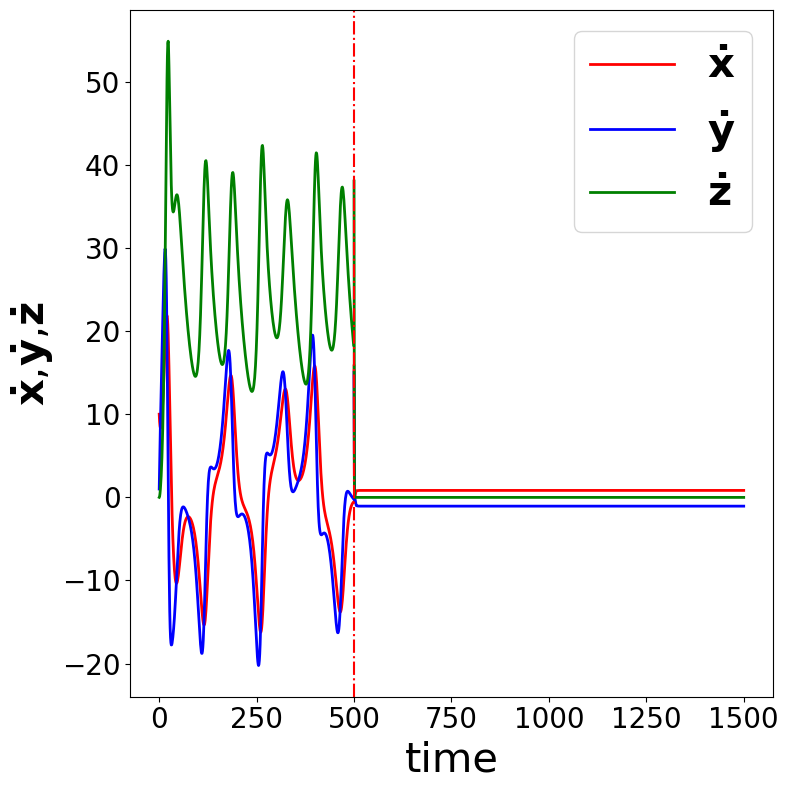

In [3]:
import gym
import numpy as np
import Lorenz_envs
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import TensorBoardOutputFormat
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EventCallback
import os
import warnings
from abc import ABC, abstractmethod
from typing import Any, Callable, Dict, List, Optional, Union
from stable_baselines3.common.vec_env import DummyVecEnv, VecEnv, sync_envs_normalization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from stable_baselines3.common.logger import Figure


import numpy as np
from fractions import Fraction
directory = 'lorenz/'


dyn_lorenz = {"sigma":10.0, "R":28.0, "b": 8/3}
x0 = np.array([10.0, 1.0, 0.0])
# x0 = np.array([-8.485, -8.485, 27])
time_step = 500
alpha = 100

x_velocity = []
def lorenz (x0, dyn, action):
    sigma = dyn['sigma']
    R = dyn['R']
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    z = x0[2]
    return np.array([sigma * (y - x), x * (R + alpha*action - z) - y, x * y - b * z])


def RungeKutta (dyn, f, dt, x0, action):
    k1 = f(x0, dyn, action/4)*dt #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, action/4)*dt
    k3 = f(x0 + 0.5*k2*dt, dyn, action/4)*dt
    k4 = f(x0 + k3*dt, dyn, action/4)*dt
    x = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f_t (dyn, f, dt, x0, T, action):
    x = np.empty(shape=(len(x0),T))
    x[:, 0] = x0     
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1], action) 
    return x

x = f_t(dyn_lorenz, lorenz, 0.01, x0, time_step, 0)

# xfinal1 = np.load('lorenz_trajectory-1.npy')
# xfinal = np.load('lorenz_trajectory.npy')
# xfinal3 = np.load('lorenz_trajectory-2.npy')
xfinal = np.load('lorenz_trajectory-3.npy')
# xfinal = np.load('lorenz_trajectory-4.npy')

# [-8.485, -8.485, 27]
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection="3d")
# ax.scatter3D(x0[0], x0[1], x0[2], s=50,alpha=1)
# ax.plot3D(x[0], x[1], x[2], alpha=0.4, linewidth=5)
# ax.plot3D(xfinal1[0], xfinal1[1], xfinal1[2], c='green', alpha=0.4, linewidth=5)
# ax.plot3D(xfinal2[0], xfinal2[1], xfinal2[2], c='green', alpha=0.4, linewidth=5)
# ax.plot3D(xfinal3[0], xfinal3[1], xfinal3[2], c='green', alpha=0.4, linewidth=5)
# ax.plot3D(xfinal4[0], xfinal4[1], xfinal4[2], c='green', alpha=0.4, linewidth=5)
# ax.plot3D(xfinal5[0], xfinal5[1], xfinal5[2], c='green', alpha=0.4, linewidth=5)
# ax.scatter3D(xfinal1[0][0], xfinal1[1][0], xfinal1[2][0], s=50, c='green',alpha=1)
# ax.scatter3D(xfinal2[0][0], xfinal2[1][0], xfinal2[2][0], s=50, c='green',alpha=1)
# ax.scatter3D(xfinal3[0][0], xfinal3[1][0], xfinal3[2][0], s=50, c='green',alpha=1)
# ax.scatter3D(xfinal4[0][0], xfinal4[1][0], xfinal4[2][0], s=50, c='green',alpha=1)
# ax.scatter3D(xfinal5[0][0], xfinal5[1][0], xfinal5[2][0], s=50, c='green',alpha=1)
# ax.scatter3D(  -8.485, -8.485,  27, s=50, c='red', marker='o')
# ax.scatter3D(  8.485,  8.485,  27 , s=100, c='red', marker='o')
# ax.scatter3D(  0,  0,  0 , s=100, c='red', marker='o')
# # ax.scatter(  0,  0,  0 , s=100, c='red', marker='o')
# # [ 0.0070262  -0.03513102  0.03513102]
# font = {'size': 20}
# ax.tick_params('x', labelsize=font['size'])
# ax.tick_params('y', labelsize=font['size'])
# ax.tick_params('z', labelsize=font['size'])
# ax.set_zlabel('Z', fontsize=25)
# ax.set_xlabel('X', fontsize=25)
# ax.set_ylabel('Y', fontsize=25)
# plt.savefig('Lorenz_attractor.png', transparent=True)

# a = np.zeros([3,len(ac)])
# for i in range(len(ac)):
#     a[:,i] = ac[i]
# a_test = a[0][1000:1020]
# fig = plt.figure(figsize=(15,15))
# ax5 = fig.add_subplot(111)
# ax5.set_title('action vs. timestep')
# ax5.set_xlabel('time')
# ax5.set_ylabel('action')
# # start, end = ax.get_xlim()
# # ax.xaxis.set_ticks(np.arange(start, end, 100))
# ax5.plot(np.array(list(range(len(a_test)))), a_test, c = 'black')
# #ax4.axhline(y = 5.6929736, color = 'r', linestyle = 'dashdot')
# plt.savefig('Lorenz_attractor_action.png')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# ax.set_title('coordinates')
ax.set_xlabel('time', fontsize=30)
ax.set_ylabel(r"$\mathbf{\dot{x}}$,$\mathbf{\dot{y}}$,$\mathbf{\dot{z}}$", fontsize=30)
ax.plot(np.array(list(range(len(x[2])))), x[0], c='red', linewidth=2,label=r"$\mathbf{\dot{x}}$")
ax.plot(np.array(list(range(len(xfinal[2]))))+time_step, xfinal[0], c = 'red', linewidth=2)
ax.plot(np.array(list(range(len(x[2])))), x[1], c='blue', linewidth=2,label=r"$\mathbf{\dot{y}}$")
ax.plot(np.array(list(range(len(xfinal[2]))))+time_step, xfinal[1], c ='blue', linewidth=2)
ax.plot(np.array(list(range(len(x[2])))), x[2], c='green', linewidth=2,label=r"$\mathbf{\dot{z}}$")
ax.plot(np.array(list(range(len(xfinal[2]))))+time_step, xfinal[2], c = 'green', linewidth=2)
# ax.axhline(y = 0, color = 'r', linestyle = 'dashdot')
trans = ax.get_xaxis_transform()
ax.axvline(x = time_step, color = 'r', linestyle = 'dashdot')
# plt.text(time_step+7, 0.8, 'control applied',rotation=90, transform=trans, fontsize=15)
plt.legend( loc='upper right', fontsize=30)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
# x1 = time_step + 1000
# x2 = time_step + 1050

# # select y-range for zoomed region
# y1 = xfinal[0][1000:1050].min()
# y2 = xfinal[0][1000:1050].max()
# # print (xfinal[0][1000:1100].mean())
# # Make the zoom-in plot:
# # axins = inset_axes(ax, zoom=10, loc=1) # zoom = 2
# axins = ax.inset_axes([0.7, 0.8, 0.3, 0.2])
# axins.plot(np.array(list(range(len(xfinal[0])))), xfinal[0], c = 'green')
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# # mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# ax.indicate_inset_zoom(axins)


# ax1 = fig.add_subplot(111)
# ax1.set_title('coordinate')
# ax1.set_xlabel('time')
# # ax1.set_ylabel('y')
# ax1.plot(np.array(list(range(len(x[2])))), x[1])
# ax1.plot(np.array(list(range(len(xfinal[2]))))+time_step, xfinal[1], c = 'green')
# ax1.axhline(y = 8.485, color = 'r', linestyle = 'dashdot')
# x1 = time_step + 1000
# x2 = time_step + 1050

# # select y-range for zoomed region
# y1 = xfinal[1][1000:1050].min()
# y2 = xfinal[1][1000:1050].max()
# # print (xfinal[0][1000:1100].mean())
# # Make the zoom-in plot:
# # axins = inset_axes(ax, zoom=10, loc=1) # zoom = 2
# axins = ax1.inset_axes([0.7, 0.8, 0.3, 0.2])
# axins.plot(np.array(list(range(len(xfinal[1])))), xfinal[1], c = 'green')
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# # mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# ax1.indicate_inset_zoom(axins)


# ax2 = fig.add_subplot(223)
# ax2.set_title('z vs. timestep')
# ax2.set_xlabel('time')
# ax2.set_ylabel('z')
# ax2.plot(np.array(list(range(len(x[2])))), x[2])
# ax2.plot(np.array(list(range(len(xfinal[2]))))+time_step, xfinal[2], color = 'green')
# ax2.axhline(y = 27, color = 'r', linestyle = 'dashdot')
# x1 = time_step + 1000
# x2 = time_step + 1050

# # select y-range for zoomed region
# y1 = xfinal[2][1000:1050].min()
# y2 = xfinal[2][1000:1050].max()
# # print (xfinal[0][1000:1100].mean())
# # Make the zoom-in plot:
# # axins = inset_axes(ax, zoom=10, loc=1) # zoom = 2
# axins = ax2.inset_axes([0.7, 0.8, 0.3, 0.2])
# axins.plot(np.array(list(range(len(xfinal[2])))), xfinal[2], c = 'green')
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# # mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# ax2.indicate_inset_zoom(axins)

# fig.suptitle('Stablization at (8.485,8.485,27)', fontsize=18)
fig.tight_layout()
plt.savefig('thesis_plots/coordinatesvstime_lorenz.png',  transparent=True)

# env.reset()
# print(env.step(env.action_space.sample()))